# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as r
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'{len(cities)} cities in dataset')

622 cities in dataset


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#define units to be in metric for url
units = 'metric'

#define url to be open weather website plus api key and units
url = f'http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units={units}'


#loop through cities and request response for each

#city_count keeps running total of cities processed
#set_count refers to number of sets without an error
city_count = 0
set_count = 1

#set up list to store response dictionaries in
city_list = []

print(f'Beginning Data Retrieval')

for city in cities:
    #add city name to url
    query_url = f'{url}&q={city}'
    #request response and convert to json
    response_json = r.get(query_url).json()
    #set up try and except to make sure incorrect/nonexistent cities are skipped
    try:
        #keep running number of cities
        city_count += 1
        print(f'Processing Record {city_count} of Set {set_count} | {city}')
        city_list.append(response_json)
    except:
        #change set count after an error occurs
        set_count += 1
        print(f'City not found. Skipping...')
        pass

ponta do sol
Processing Record 149 of Set 1 | chalchihuites
Processing Record 150 of Set 1 | kirovskiy
Processing Record 151 of Set 1 | mar del plata
Processing Record 152 of Set 1 | richard toll
Processing Record 153 of Set 1 | cherskiy
Processing Record 154 of Set 1 | grand river south east
Processing Record 155 of Set 1 | am timan
Processing Record 156 of Set 1 | los llanos de aridane
Processing Record 157 of Set 1 | kazerun
Processing Record 158 of Set 1 | kholm
Processing Record 159 of Set 1 | kaitangata
Processing Record 160 of Set 1 | vuktyl
Processing Record 161 of Set 1 | boralday
Processing Record 162 of Set 1 | alofi
Processing Record 163 of Set 1 | semey
Processing Record 164 of Set 1 | buchanan
Processing Record 165 of Set 1 | ust-karsk
Processing Record 166 of Set 1 | saint-georges
Processing Record 167 of Set 1 | artigas
Processing Record 168 of Set 1 | beira
Processing Record 169 of Set 1 | palu
Processing Record 170 of Set 1 | rawannawi
Processing Record 171 of Set 1 |

In [15]:
#empty lists for dataframe
city_names, lat, lon, max_temp, humidity, cloudiness, wind_speed, country, date = [], [], [], [], [], [], [], [], []

#loop through dictionary list appending relevant items to dataframe lists
for i in range(0, (len(cities)-1)):
    try:
        city_names.append(city_list[i]['name']),
        lat.append(city_list[i]['coord']['lat']),
        lon.append(city_list[i]['coord']['lon']),
        max_temp.append(city_list[i]['main']['temp_max'] * (9/5) + 32),
        humidity.append(city_list[i]['main']['humidity'] / 100),
        cloudiness.append(city_list[i]['clouds']['all'] / 100),
        wind_speed.append(city_list[i]['wind']['speed']),
        country.append(city_list[i]['sys']['country']),
        date.append(city_list[i]['dt'])
    except:
        pass

In [18]:
#make new dataframe
city_data = pd.DataFrame({
    'City': city_names,
    'Latitude': lat, 
    'Longitude': lon,
    'Temperature (F)': max_temp,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed,
    'Country': country,
    'Date': date
})

#* Export the city data into a .csv.
city_data.to_csv(output_data_file, index=False)
#* Display the DataFrame
city_data

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Kapaa,22.08,-159.32,75.200,0.88,0.90,10.80,US,1594707408
1,Tasiilaq,65.61,-37.64,41.000,0.86,0.38,4.10,GL,1594707423
2,Rikitea,-23.12,-134.97,72.788,0.84,1.00,7.15,PF,1594707407
3,Isangel,-19.55,169.27,78.800,0.69,0.75,2.60,VU,1594707440
4,Lagoa,39.05,-27.98,67.964,0.78,0.13,2.53,PT,1594707588
...,...,...,...,...,...,...,...,...,...
560,Fortuna,40.60,-124.16,53.006,0.93,0.01,0.27,US,1594707427
561,Takoradze,4.88,-1.76,73.796,0.88,0.25,4.43,GH,1594707728
562,Farim,12.48,-15.22,75.398,0.93,0.96,2.23,GW,1594707728
563,Pundaguitan,6.37,126.17,84.632,0.66,0.05,1.72,PH,1594707728


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
#confirm there are no outliers with humidity over 100
outliers = city_data[city_data['Humidity (%)'] > 1]
print(f'There are {len(outliers)} outliers')

There are 0 outliers


In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data[city_data['Humidity (%)'] <= 1]
clean_city_data

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Kapaa,22.08,-159.32,75.200,0.88,0.90,10.80,US,1594707408
1,Tasiilaq,65.61,-37.64,41.000,0.86,0.38,4.10,GL,1594707423
2,Rikitea,-23.12,-134.97,72.788,0.84,1.00,7.15,PF,1594707407
3,Isangel,-19.55,169.27,78.800,0.69,0.75,2.60,VU,1594707440
4,Lagoa,39.05,-27.98,67.964,0.78,0.13,2.53,PT,1594707588
...,...,...,...,...,...,...,...,...,...
560,Fortuna,40.60,-124.16,53.006,0.93,0.01,0.27,US,1594707427
561,Takoradze,4.88,-1.76,73.796,0.88,0.25,4.43,GH,1594707728
562,Farim,12.48,-15.22,75.398,0.93,0.96,2.23,GW,1594707728
563,Pundaguitan,6.37,126.17,84.632,0.66,0.05,1.72,PH,1594707728


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [25]:
def linear_regression(x, y, color):
    #retrieve values from referenced columns
    x_values = clean_city_data[f'{x}']
    y_values = clean_city_data[f'{y}']

    #plot x and y values
    fig, ax = plt.subplots()
    ax.scatter(x_values, y_values, c=color, alpha=0.5)
    ax.set_title(f'{x} vs. {y}', fontsize=15, fontweight='bold')
    ax.set_xlabel(f'{x}', fontsize=12, fontstyle='italic')
    ax.set_ylabel(f'{y}', fontsize=12, fontstyle='italic')
    plt.savefig(f'WeatherPy_figs/{x}_vs_{y}.png')

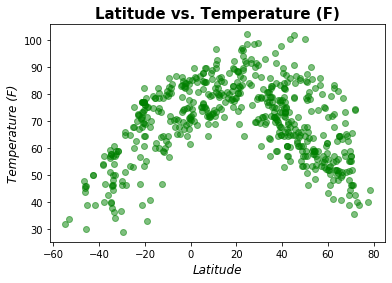

In [26]:
linear_regression('Latitude', 'Temperature (F)', 'green')

#Observation: This chart is ploting max temperature for each city against that city's latitude. The graph shows that temperature goes up as latitude gets closer to zero (equator), which is expected.

## Latitude vs. Humidity Plot

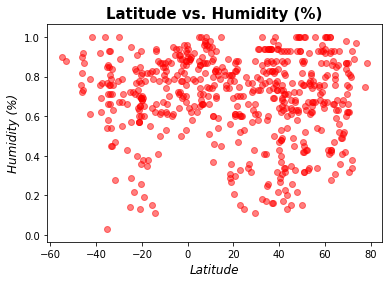

In [27]:
linear_regression('Latitude', 'Humidity (%)', 'red')

#Observation: This chart is ploting humidity for each city against that city's latitude. 

## Latitude vs. Cloudiness Plot

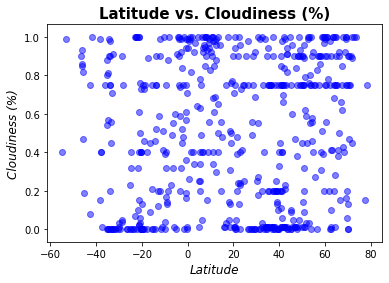

In [28]:
linear_regression('Latitude', 'Cloudiness (%)', 'blue')

#Observation: This chart is ploting cloudiness for each city against that city's latitude. This chart shows the data is spread fairly evenly across all latitudes. 

## Latitude vs. Wind Speed Plot

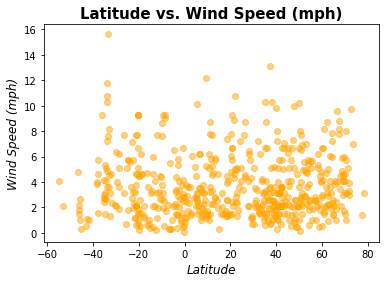

In [30]:
linear_regression('Latitude', 'Wind Speed (mph)', 'orange')

#Observation: This chart is ploting wind speed for each city against that city's latitude. This chart shows that wind speed, for the most part, is fairly consistent and fairly low accross all latitudes. 

## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(df, x_label, y_label):
    x = df[f'{x_label}']
    y = df[f'{y_label}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    if intercept > 0:
        color1 = 'blue'
        color2 = 'red'
        y_coord = 5
    else:
        color1 = 'red'
        color2 = 'blue'
        y_coord = -5
    fig, ax = plt.subplots()
    ax.scatter(x, y, c=color1, alpha=0.5)
    ax.plot(x, regress_values, c=color2)
    #ax.annotate(line_eq,(1,y_coord), fontsize=15, c=color2)
    ax.set_title(f'{x_label} vs. {y_label}', fontsize=15, fontweight='bold')
    ax.set_xlabel(f'{x_label}', fontsize=12, fontstyle='italic')
    ax.set_ylabel(f'{y_label}', fontsize=12, fontstyle='italic')
    ax.text(0.05, 0.95, line_eq, transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top', color=color2)
    plt.savefig(f'WeatherPy_figs/{x_label}_vs_{y_label}.png')

In [32]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data[clean_city_data['Latitude'] > 0]
southern_df = clean_city_data[clean_city_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

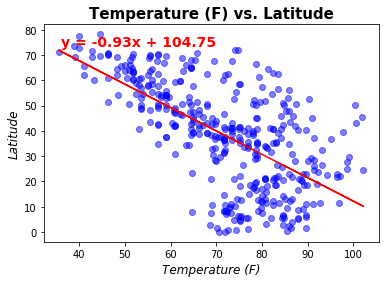

In [35]:
linear_regression_plot(northern_df, 'Temperature (F)', 'Latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

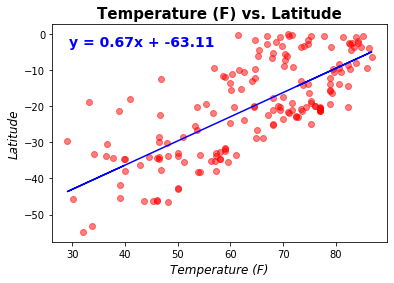

In [37]:
linear_regression_plot(southern_df, 'Temperature (F)', 'Latitude')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

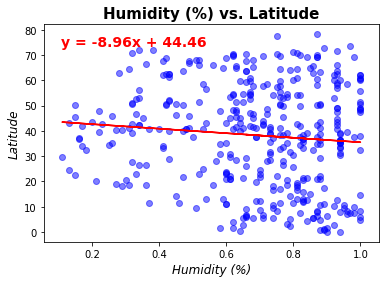

In [38]:
linear_regression_plot(northern_df, 'Humidity (%)', 'Latitude')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

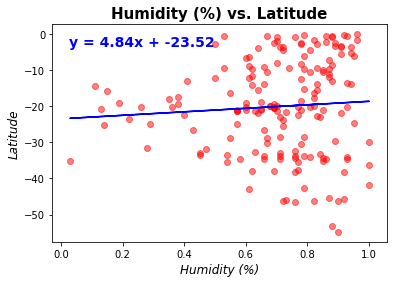

In [39]:
linear_regression_plot(southern_df, 'Humidity (%)', 'Latitude')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

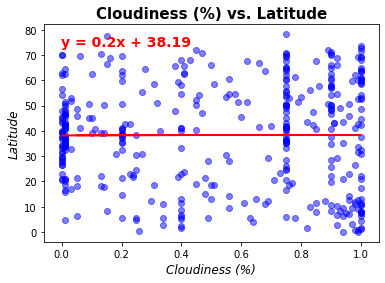

In [40]:
linear_regression_plot(northern_df, 'Cloudiness (%)', 'Latitude')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

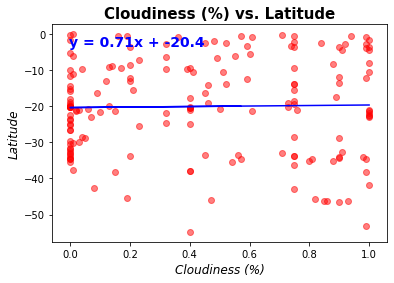

In [41]:
linear_regression_plot(southern_df, 'Cloudiness (%)', 'Latitude')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

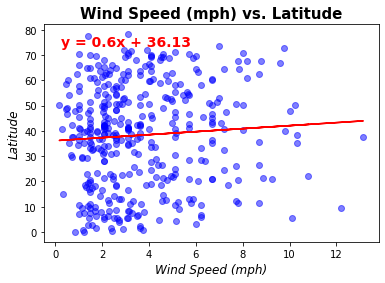

In [42]:
linear_regression_plot(northern_df, 'Wind Speed (mph)', 'Latitude')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

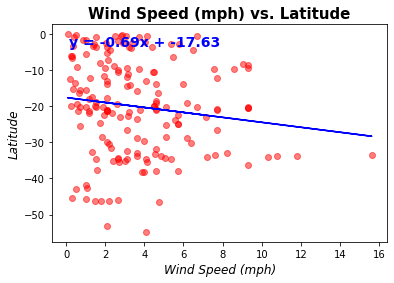

In [43]:
linear_regression_plot(southern_df, 'Wind Speed (mph)', 'Latitude')